## Importing Dataset

In [116]:
import pandas as pd
df = pd.read_csv('dataset.csv', encoding="utf-8-sig")
df.shape

(4966, 29)

In [117]:
df.sample(3)

,Keyword,Rank,Title_Of_Page,URL,Lenght_Of_Title,Presence_of_Keyword_in_Title,Title_Starts_with_Keyword,Lenght_of_Url,Presence_Of_Keyword_In_Url,Domain_Name,...,Keyword_in_Description,Total_Images,Images_Without_Alt_Tags,Images_With_Alt_Tag,Keyword_in_Alt_Tags_of_Images,Total_Links,Internal_Links,External_Links,Presence_of_Internal_Link,Presence_of_External_Links
3366,tie,86.0,std::tie - cppreference.com,https://en.cppreference.com/w/cpp/utility/tupl...,27,0,0,51,1,en.cppreference.com,...,0,3,3,0,0,0,0,0,0,0
4857,hair combs,91.0,Combs - Combs & Brushes - Health & Beauty,https://www.lattliv.com.pk/health-beauty/combs...,41,1,0,65,1,www.lattliv.com.pk,...,0,48,38,10,0,359,354,5,1,1
3588,gown,8.0,Indo Western Gowns For Women Online | Utsav Fa...,https://www.utsavfashion.com/indowestern/gowns,51,0,0,46,1,www.utsavfashion.com,...,1,45,0,45,30,379,367,12,1,1


In [118]:
df.dtypes

Keyword                           object
Rank                             float64
Title_Of_Page                     object
URL                               object
Lenght_Of_Title                    int64
Presence_of_Keyword_in_Title       int64
Title_Starts_with_Keyword          int64
Lenght_of_Url                      int64
Presence_Of_Keyword_In_Url         int64
Domain_Name                       object
No_of_H1_Tags                      int64
Presence_of_Keyword_in_H1_Tag      int64
No_of_H2_tags                      int64
Presence_of_Keyword_in_H2_Tag      int64
No_of_H3_Tags                      int64
Presence_of_Keyword_in_H3_Tag      int64
Content_Lenght                     int64
Keyword_Denisty                  float64
Lenght_of_Description              int64
Keyword_in_Description             int64
Total_Images                       int64
Images_Without_Alt_Tags            int64
Images_With_Alt_Tag                int64
Keyword_in_Alt_Tags_of_Images      int64
Total_Links     

## Making Classes

In [119]:
import math
import numpy as np

df['class'] = (df['Rank'] / 10).apply(np.ceil)
df['class'] = df['class'] - 1
df['class'] = np.where(df['class'] > 1, 2, df['class'])
df['class'].unique()

array([0., 1., 2.])

In [120]:
df = df.drop(columns=['Keyword', 'Title_Of_Page', 'URL', 'Domain_Name'])


In [121]:
df.sample(10)

,Rank,Lenght_Of_Title,Presence_of_Keyword_in_Title,Title_Starts_with_Keyword,Lenght_of_Url,Presence_Of_Keyword_In_Url,No_of_H1_Tags,Presence_of_Keyword_in_H1_Tag,No_of_H2_tags,Presence_of_Keyword_in_H2_Tag,...,Total_Images,Images_Without_Alt_Tags,Images_With_Alt_Tag,Keyword_in_Alt_Tags_of_Images,Total_Links,Internal_Links,External_Links,Presence_of_Internal_Link,Presence_of_External_Links,class
1117,26.0,64,1,0,54,1,1,1,1,1,...,116,17,99,0,190,184,6,1,1,2.0
2188,4.0,62,1,1,31,1,1,1,3,1,...,13,2,11,11,343,335,8,1,1,0.0
1100,9.0,29,0,0,54,1,2,0,0,0,...,13,1,12,0,99,87,12,1,1,0.0
3439,59.0,60,1,1,95,1,1,1,7,1,...,9,0,9,2,33,30,3,1,1,2.0
1323,35.0,36,1,1,38,0,1,1,0,0,...,76,49,27,2,435,429,6,1,1,2.0
1220,32.0,30,1,1,50,1,1,1,1,0,...,2,1,1,0,69,62,7,1,1,2.0
1420,32.0,28,1,1,54,1,1,1,11,0,...,63,2,61,4,172,152,20,1,1,2.0
2871,89.0,63,1,1,55,1,4,1,48,0,...,180,66,114,0,205,185,20,1,1,2.0
3950,74.0,52,1,1,21,0,0,0,0,0,...,21,19,2,0,48,46,2,1,1,2.0
3810,32.0,40,1,1,74,1,1,0,0,0,...,2,2,0,0,0,0,0,0,0,2.0


In [122]:
X = df.drop(columns=['Rank', 'class'])
y = df['class']
y.unique()


array([0., 1., 2.])

## One Hot Encoding
#### HotEncoder introduce Dummy variables (and that shall include only 0 and 1)

In [123]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

## Splitting the dataset into the Training set and Test set

In [124]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Feature Scaling

In [125]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [126]:
X_test.shape

(1490, 24)

In [127]:
X_train.shape

(3476, 24)

In [128]:
df.isnull().sum()

Rank                             0
Lenght_Of_Title                  0
Presence_of_Keyword_in_Title     0
Title_Starts_with_Keyword        0
Lenght_of_Url                    0
Presence_Of_Keyword_In_Url       0
No_of_H1_Tags                    0
Presence_of_Keyword_in_H1_Tag    0
No_of_H2_tags                    0
Presence_of_Keyword_in_H2_Tag    0
No_of_H3_Tags                    0
Presence_of_Keyword_in_H3_Tag    0
Content_Lenght                   0
Keyword_Denisty                  0
Lenght_of_Description            0
Keyword_in_Description           0
Total_Images                     0
Images_Without_Alt_Tags          0
Images_With_Alt_Tag              0
Keyword_in_Alt_Tags_of_Images    0
Total_Links                      0
Internal_Links                   0
External_Links                   0
Presence_of_Internal_Link        0
Presence_of_External_Links       0
class                            0
dtype: int64

## Initialising the Artificial Neural Network

In [129]:
# Importing the Keras libraries and packages
# !pip install keras
# !pip install tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()
model = Sequential()

## Adding Layers

In [130]:
# Input layer
model.add(Dense(24,input_shape=(24,), activation='relu'))
# Adding the output layer
model.add(Dense(3, activation='softmax'))


## Compiling the ANN
#### adam is implemenation version of stocahastic gradient descent.

In [131]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting the ANN to the Training set

In [132]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=10, epochs=1000)

Epoch 1/1000
348/348 [==============================] - 1s 1ms/step - loss: 0.8885 - accuracy: 0.6934
Epoch 2/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.7935
Epoch 3/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7920
Epoch 4/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.7896
Epoch 5/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7941
Epoch 6/1000
348/348 [==============================] - 1s 1ms/step - loss: 0.6247 - accuracy: 0.7948
Epoch 7/1000
348/348 [==============================] - 1s 1ms/step - loss: 0.6072 - accuracy: 0.8076
Epoch 8/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.8036
Epoch 9/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.7963
Epoch 10/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.607

348/348 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.8049
Epoch 81/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.8156
Epoch 82/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.8149
Epoch 83/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.8094
Epoch 84/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.8113
Epoch 85/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.8063
Epoch 86/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5249 - accuracy: 0.8207
Epoch 87/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.8026
Epoch 88/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7999
Epoch 89/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5454 - a

348/348 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.8202
Epoch 159/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.8108
Epoch 160/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.5391 - accuracy: 0.8022
Epoch 161/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.8061
Epoch 162/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8066
Epoch 163/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.8095
Epoch 164/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.8161
Epoch 165/1000
348/348 [==============================] - 1s 1ms/step - loss: 0.5012 - accuracy: 0.8167
Epoch 166/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.5194 - accuracy: 0.8127
Epoch 167/1000
348/348 [==============================] - 1s 2ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.8074
Epoch 237/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.8232
Epoch 238/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.8126
Epoch 239/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7952
Epoch 240/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8024
Epoch 241/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.8102
Epoch 242/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.8128
Epoch 243/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5072 - accuracy: 0.8197
Epoch 244/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.8037
Epoch 245/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.8199
Epoch 315/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.8180
Epoch 316/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8158
Epoch 317/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.8053
Epoch 318/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.8044
Epoch 319/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8160
Epoch 320/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.8109
Epoch 321/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.8095
Epoch 322/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.8100
Epoch 323/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.8022
Epoch 393/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.8135
Epoch 394/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.8189
Epoch 395/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8083
Epoch 396/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.8082
Epoch 397/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.8207
Epoch 398/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8274
Epoch 399/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.8105
Epoch 400/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.8152
Epoch 401/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8264
Epoch 471/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.8196
Epoch 472/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.8176
Epoch 473/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.8125
Epoch 474/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.8165
Epoch 475/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.8235
Epoch 476/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.8092
Epoch 477/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.8034
Epoch 478/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.8123
Epoch 479/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8187
Epoch 549/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8241
Epoch 550/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8242
Epoch 551/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8168
Epoch 552/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8192
Epoch 553/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.8187
Epoch 554/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8130
Epoch 555/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8271
Epoch 556/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.8202
Epoch 557/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.8232
Epoch 627/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.8304
Epoch 628/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.8095
Epoch 629/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.8290
Epoch 630/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.8104
Epoch 631/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.8014
Epoch 632/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8173
Epoch 633/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8152
Epoch 634/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.8127
Epoch 635/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.8131
Epoch 705/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.8279
Epoch 706/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.8176
Epoch 707/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.8216
Epoch 708/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8323
Epoch 709/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.8217
Epoch 710/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.8190
Epoch 711/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.8192
Epoch 712/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.8117
Epoch 713/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.8202
Epoch 783/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.8200
Epoch 784/1000
348/348 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.8189
Epoch 785/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.8237
Epoch 786/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.8027
Epoch 787/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8117
Epoch 788/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.8254
Epoch 789/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.8139
Epoch 790/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8260
Epoch 791/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8127
Epoch 861/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.8194
Epoch 862/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.8176
Epoch 863/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.8178
Epoch 864/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.8157
Epoch 865/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.8158
Epoch 866/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.8207
Epoch 867/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.8108
Epoch 868/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.8120
Epoch 869/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

348/348 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.8270
Epoch 939/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8342
Epoch 940/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.8380
Epoch 941/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8221
Epoch 942/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8243
Epoch 943/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8207
Epoch 944/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8253
Epoch 945/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.8208
Epoch 946/1000
348/348 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8173
Epoch 947/1000
348/348 [==============================] - 0s 1ms/step - loss: 0

## Making predictions and evaluating the model

In [133]:
# Evaluate the model on test set
model.evaluate(X_train, y_train)

109/109 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8234


[0.4789387881755829, 0.8233602046966553]

## Calculating Root Mean Square Error

In [134]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
y_pred
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print ("mean_squared_error: ", mse)
print ("root_mean_squared_error: ", rmse)

mean_squared_error:  0.12168145
root_mean_squared_error:  0.34882867


In [135]:
# Predictions
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.21      0.10      0.13       143
           1       0.13      0.07      0.09       133
           2       0.83      0.93      0.88      1214

    accuracy                           0.77      1490
   macro avg       0.39      0.36      0.37      1490
weighted avg       0.71      0.77      0.73      1490

[[  14    6  123]
 [  17    9  107]
 [  37   52 1125]]


## Confusion Matrix

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
cm

array([[  14,    6,  123],
       [  17,    9,  107],
       [  37,   52, 1125]], dtype=int64)

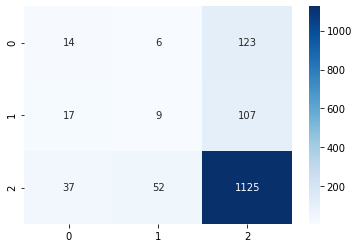

In [138]:
# Ploting Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap (cm, annot=True, cmap = 'Blues', fmt='g')
plt.savefig('ANN - 3 Classes.png')

In [139]:
w = model.get_weights()
w

[array([[ 9.18577075e-01,  7.99055398e-02, -1.37753159e-01,
          1.19030428e+00, -1.24455893e+00, -1.30377322e-01,
         -8.56670067e-02,  1.00998759e+00, -6.58023000e-01,
          4.85747039e-01,  1.15179956e+00,  7.07815513e-02,
         -3.61131907e-01,  8.71925354e-01,  7.79629529e-01,
         -3.38309795e-01,  1.00169933e+00,  1.08522311e-01,
          1.04077041e+00,  1.51123613e-01, -3.42059642e-01,
          1.89471459e+00, -4.86760288e-01, -1.34093672e-01],
        [-1.50456280e-01, -4.47983146e-01,  3.55061650e-01,
         -3.91270369e-01,  4.83683079e-01, -3.13212752e-01,
         -1.62146166e-02,  1.77296832e-01, -9.00670439e-02,
         -3.58689427e-01, -4.26269114e-01,  1.88211814e-01,
         -9.17512327e-02,  2.23932490e-02, -6.78160310e-01,
         -4.65000212e-01,  2.37229958e-01,  2.56108105e-01,
         -6.69449707e-03,  7.11254239e-01,  1.58154637e-01,
         -6.44439995e-01,  3.35174382e-01, -1.92330539e-01],
        [-7.62526631e-01,  9.49201226e

In [140]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.save('ANN Model - 3 Classes.h5')

In [142]:
from keras.models import load_model
new_model = load_model('ANN Model - 3 Classes.h5')

In [143]:
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [144]:
print("list: ",X_test[117:118][0])

list:  [-0.0787127   0.45029786  0.52229671  1.25960831  0.48683742  0.15453361
  0.77673743  3.65532532 -0.48185804 -0.46387797 -0.28492448  0.24426298
 -0.5257728  -0.98574422 -0.75830351  0.03761023 -0.3554718   0.2265692
  0.28283899 -0.11854736 -0.16812285  0.59939552  0.2444506   0.27172375]


In [145]:
check = [[67, 1, 1, 20, 0, 1, 0, 0, 0, 21, 0, 15067, 0.32, 158, 0, 285, 281, 4, 0, 159, 137, 22, 1, 1]]
check = sc.transform(check)
check

array([[ 1.46470201,  0.45029786,  0.52229671, -1.55303726, -2.05407381,
        -0.10955627, -1.28743635, -0.53543712, -0.48185804,  0.36118078,
        -0.28492448, -0.1448675 ,  0.14106506,  0.19742374, -0.75830351,
         2.25908338,  6.12608262, -0.52509922, -0.20251127, -0.07518573,
        -0.08602796,  0.12758872,  0.2444506 ,  0.27172375]])

In [146]:
y_pred = new_model.predict(X_test[117:127])
print (y_pred[0])
y_pred_class = np.argmax(y_pred,axis=1)
print(y_pred_class)

[0.93259376 0.01929214 0.0481142 ]
[0 2 2 2 2 2 2 0 2 2]


In [147]:
new_model.get_weights()[2][0:2]

array([[-0.30547452,  0.06563308,  0.55954367],
       [-1.100279  , -0.16358802,  0.6179631 ]], dtype=float32)